OPTIONS PRICING USING MONTE CARLO SIMULATIONS

In [106]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [107]:
#IMPORTING THE LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

In [108]:
data = ['SPY']          #Analysis will be performed on S&P500
start = "2017-12-10"
end = "2022-12-10"

In [109]:
df = yf.download(data,start,end)
display(df)
newdf = df.reset_index()                                            #reset the index as earlier it had multilevel indexing 
newdf = newdf.set_index(pd.DatetimeIndex(newdf['Date'].values))     
print("After resetting the index Dataframe is:")      
newdf


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-11,266.309998,266.380005,265.480011,266.309998,243.264587,83077500
2017-12-12,267.209991,267.320007,266.350006,266.779999,243.693939,85195800
2017-12-13,267.059998,267.559998,266.649994,266.750000,243.666565,102905400
2017-12-14,267.089996,267.220001,265.600006,265.660004,242.670837,100666700
2017-12-15,265.450012,267.040009,265.390015,266.510010,244.691650,144610300
...,...,...,...,...,...,...
2022-12-05,403.950012,404.929993,398.170013,399.589996,397.763458,77289800
2022-12-06,399.420013,399.989990,391.640015,393.829987,392.029785,77972200
2022-12-07,392.940002,395.640015,391.970001,393.160004,391.362854,65927900


After resetting the index Dataframe is:


,Date,Open,High,Low,Close,Adj Close,Volume
2017-12-11,2017-12-11,266.309998,266.380005,265.480011,266.309998,243.264587,83077500
2017-12-12,2017-12-12,267.209991,267.320007,266.350006,266.779999,243.693939,85195800
2017-12-13,2017-12-13,267.059998,267.559998,266.649994,266.750000,243.666565,102905400
2017-12-14,2017-12-14,267.089996,267.220001,265.600006,265.660004,242.670837,100666700
2017-12-15,2017-12-15,265.450012,267.040009,265.390015,266.510010,244.691650,144610300
...,...,...,...,...,...,...,...
2022-12-05,2022-12-05,403.950012,404.929993,398.170013,399.589996,397.763458,77289800
2022-12-06,2022-12-06,399.420013,399.989990,391.640015,393.829987,392.029785,77972200
2022-12-07,2022-12-07,392.940002,395.640015,391.970001,393.160004,391.362854,65927900
2022-12-08,2022-12-08,395.140015,397.359985,393.269989,396.239990,394.428772,60737900


In [110]:
highp = newdf['High']
lowp = newdf['Low']

In [111]:
#made a new column named aroon_oscillator filled with nan to be filled by fututre aroonosc values
newdf['aroon_oscillator'] = np.nan
newdf

,Date,Open,High,Low,Close,Adj Close,Volume,aroon_oscillator
2017-12-11,2017-12-11,266.309998,266.380005,265.480011,266.309998,243.264587,83077500,NaN
2017-12-12,2017-12-12,267.209991,267.320007,266.350006,266.779999,243.693939,85195800,NaN
2017-12-13,2017-12-13,267.059998,267.559998,266.649994,266.750000,243.666565,102905400,NaN
2017-12-14,2017-12-14,267.089996,267.220001,265.600006,265.660004,242.670837,100666700,NaN
2017-12-15,2017-12-15,265.450012,267.040009,265.390015,266.510010,244.691650,144610300,NaN
...,...,...,...,...,...,...,...,...
2022-12-05,2022-12-05,403.950012,404.929993,398.170013,399.589996,397.763458,77289800,NaN
2022-12-06,2022-12-06,399.420013,399.989990,391.640015,393.829987,392.029785,77972200,NaN
2022-12-07,2022-12-07,392.940002,395.640015,391.970001,393.160004,391.362854,65927900,NaN
2022-12-08,2022-12-08,395.140015,397.359985,393.269989,396.239990,394.428772,60737900,NaN


#AROON OSCILLATOR


##What is Aroon Oscillator?

The Aroon Oscillator is a trend-following indicator that uses aspects of the Aroon Indicator (Aroon Up and Aroon Down) to gauge the strength of a current trend and the likelihood that it will continue.

For more refrence visit:https://www.investopedia.com/terms/a/aroonoscillator.asp#:~:text=our%20editorial%20policies-,What%20Is%20the%20Aroon%20Oscillator%3F,likelihood%20that%20it%20will%20continue.

##Calculation of aroon oscillator is as followed: 
note:except we took anytime "period" ,namely tf, instead of 25 as mentioned in formula below

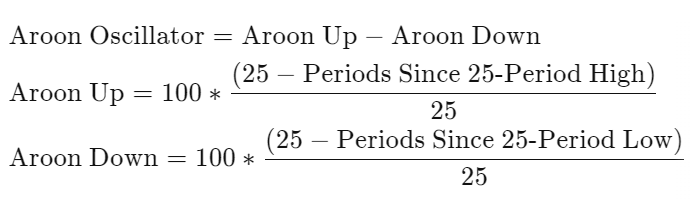

In [112]:

def aroon(tf):

  aroonup = []
  aroondown = []
  aroondate = []
  aroonoscillator = [] 
  x = tf

  while x < len(newdf):
    aroon_up = ((highp[x-tf:x].tolist().index(max(highp[x-tf:x])))/tf)*100

    aroon_down = ((lowp[x-tf:x].tolist().index(min(lowp[x-tf:x])))/tf)*100

    aroon_osc = aroon_up - aroon_down

    aroonup.append(aroon_up)
    aroondown.append(aroon_down)
    aroonoscillator.append(aroon_osc)
    aroondate.append(newdf['Date'][x])

    x = x+1
  return aroonup,aroondown,aroonoscillator,aroondate

In [113]:
arnup,arndwn,aroonosc,adate = aroon(25)
newstdf = newdf[25:]                      #we slice newdf as  values of aroonosc will start from index 25
newstdf['aroon_oscillator'] = aroonosc
newstdf

<ipython-input-113-d9694154b225>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newstdf['aroon_oscillator'] = aroonosc


,Date,Open,High,Low,Close,Adj Close,Volume,aroon_oscillator
2018-01-18,2018-01-18,279.480011,279.959991,278.579987,279.140015,256.287720,100728000,76.0
2018-01-19,2018-01-19,279.799988,280.410004,279.140015,280.410004,257.453766,140920100,76.0
2018-01-22,2018-01-22,280.170013,282.690002,280.109985,282.690002,259.547089,91322400,88.0
2018-01-23,2018-01-23,282.739990,283.619995,282.369995,283.290009,260.097900,97084700,92.0
2018-01-24,2018-01-24,284.019989,284.700012,281.839996,283.179993,259.996918,134816100,96.0
...,...,...,...,...,...,...,...,...
2022-12-05,2022-12-05,403.950012,404.929993,398.170013,399.589996,397.763458,77289800,76.0
2022-12-06,2022-12-06,399.420013,399.989990,391.640015,393.829987,392.029785,77972200,76.0
2022-12-07,2022-12-07,392.940002,395.640015,391.970001,393.160004,391.362854,65927900,76.0
2022-12-08,2022-12-08,395.140015,397.359985,393.269989,396.239990,394.428772,60737900,76.0


Text(0.5, 1.0, 'aroonosc')

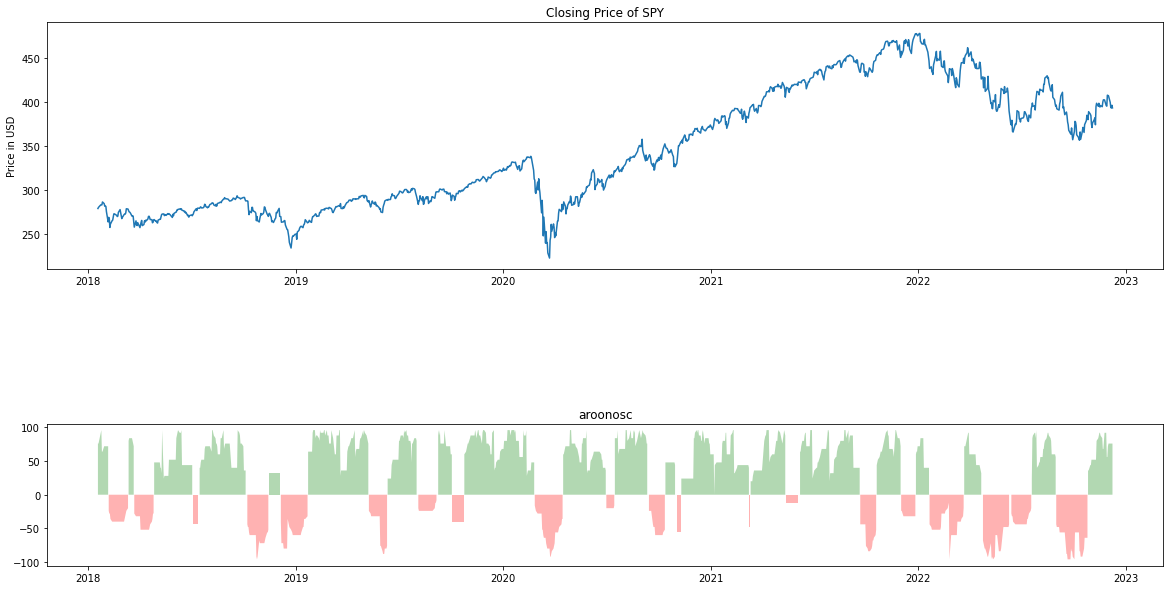

In [114]:
plt.figure(figsize = (20,10))
ax1 = plt.subplot(2,1,1)
ax1.plot(newstdf['Close'])
ax1.set_title('Closing Price of SPY')
ax1.set_ylabel('Price in USD')

ax2 = plt.subplot2grid((11,1), (8,0), rowspan = 5, colspan = 1)
ax2.fill_between(adate[:],aroonosc[:],0, where = (np.array(aroonosc[:]) >= 0), facecolor = 'g',alpha =0.3)
ax2.fill_between(adate[:],aroonosc[:],0, where = (np.array(aroonosc[:]) <= 0), facecolor = 'r',alpha =0.3)
ax2.set_title('aroonosc')

In [115]:
def buy_sell2(signal,ao):
  buy_price = []
  sell_price = []
  flag = -1

  for i in range(1,len(signal)):
    if ao[i] > 0 and ao[i-1] < 0 and flag != 1:
      buy_price.append(signal['Close'][i])
      sell_price.append(np.nan)
      flag = 1
    if ao[i] < 0 and ao[i-1] > 0 and flag != 0:
      sell_price.append(signal['Close'][i])
      buy_price.append(np.nan)
      flag = 0
    else:
      buy_price.append(np.nan)
      sell_price.append(np.nan)
  return buy_price,sell_price 

In [116]:
x = buy_sell2(newstdf,newstdf['aroon_oscillator'])
newstdf['Buysigprice'] = x[0][19:]
newstdf['Sellsigprice'] = x[1][19:]
newstdf

<ipython-input-116-00facc05ef2b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newstdf['Buysigprice'] = x[0][19:]
<ipython-input-116-00facc05ef2b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newstdf['Sellsigprice'] = x[1][19:]


,Date,Open,High,Low,Close,Adj Close,Volume,aroon_oscillator,Buysigprice,Sellsigprice
2018-01-18,2018-01-18,279.480011,279.959991,278.579987,279.140015,256.287720,100728000,76.0,NaN,NaN
2018-01-19,2018-01-19,279.799988,280.410004,279.140015,280.410004,257.453766,140920100,76.0,NaN,NaN
2018-01-22,2018-01-22,280.170013,282.690002,280.109985,282.690002,259.547089,91322400,88.0,NaN,NaN
2018-01-23,2018-01-23,282.739990,283.619995,282.369995,283.290009,260.097900,97084700,92.0,NaN,NaN
2018-01-24,2018-01-24,284.019989,284.700012,281.839996,283.179993,259.996918,134816100,96.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-12-05,2022-12-05,403.950012,404.929993,398.170013,399.589996,397.763458,77289800,76.0,NaN,NaN
2022-12-06,2022-12-06,399.420013,399.989990,391.640015,393.829987,392.029785,77972200,76.0,NaN,NaN
2022-12-07,2022-12-07,392.940002,395.640015,391.970001,393.160004,391.362854,65927900,76.0,NaN,NaN
2022-12-08,2022-12-08,395.140015,397.359985,393.269989,396.239990,394.428772,60737900,76.0,NaN,NaN


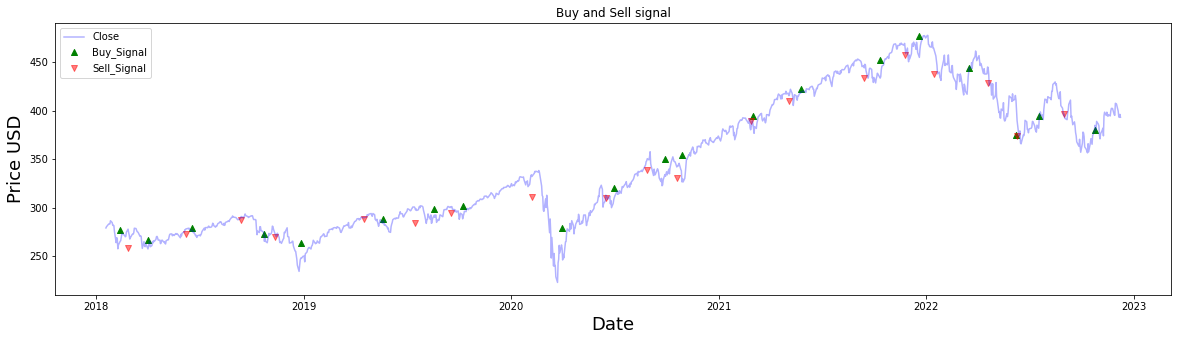

In [117]:
plt.figure(figsize = (20,5))
plt.plot(newstdf['Close'],label = 'Close',color = 'b', alpha = 0.3)
plt.scatter(newstdf.index,newstdf['Buysigprice'],
            label = 'Buy_Signal',
            marker = '^',
            color = 'g', alpha = 1)
plt.scatter(newstdf.index,newstdf['Sellsigprice'],
            label = 'Sell_Signal',
            marker = 'v',
            color = 'r', alpha = .5)
plt.title('Buy and Sell signal')
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Price USD',fontsize = 18)
plt.legend(loc = 'upper left')
plt.show()

In [127]:
capital = 1000000
no_of_stocks = capital // max(newstdf.Close)
cash = 1000000
stocks_held = 0
buy_check = newstdf['Buysigprice'].isna()
sell_check = newstdf['Sellsigprice'].isna()

for i in range(1,len(newstdf)):

  if buy_check[i] == False:
    cash -= no_of_stocks*newstdf['Buysigprice'][i]
    stocks_held += no_of_stocks

  if sell_check[i] == False:
    cash += no_of_stocks*newstdf['Sellsigprice'][i]
    stocks_held -= no_of_stocks

final_assets = (cash + stocks_held*newstdf['Close'][len(newstdf)-1])
no_of_days = len(newstdf)
returns = ((final_assets/capital)**(float(no_of_days)/(5*365))-1)*100

print("Profit",returns,'%')

Profit 10.54227132911949 %


#ON BALANCE VOLUME INDICATOR

##WHAT IS ON BALNCE VOLUME INDICATOR?


On-balance volume (OBV) is a technical trading momentum indicator that uses volume flow to predict changes in stock price.

For more refrence visit:https://www.investopedia.com/terms/o/onbalancevolume.asp

##ON BALANCE VOLUME FORMULA:


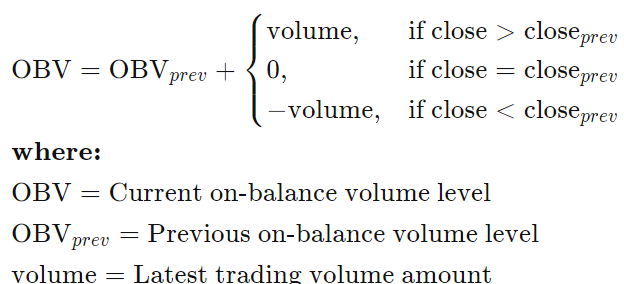

In [119]:
obv = []
obv.append(0)

for i in range(1,len(newdf['Close'])):
  if df.Close[i] > df.Close[i-1]:
    obv.append(obv[-1] + newdf.Volume[i])
  elif df.Close[i] < df.Close[i-1]:
    obv.append(obv[-1] - newdf.Volume[i])
  else:
    obv.append(obv[-1])  

**NOTE:The strategy to trade with OBV requires OBV EMA also so we will create a column for OBV EMA.**

In [120]:
newdf['OBV'] = obv
newdf['OBV_EMA'] = newdf['OBV'].ewm(span = 200).mean()
newdf

,Date,Open,High,Low,Close,Adj Close,Volume,aroon_oscillator,OBV,OBV_EMA
2017-12-11,2017-12-11,266.309998,266.380005,265.480011,266.309998,243.264587,83077500,NaN,0,0.000000e+00
2017-12-12,2017-12-12,267.209991,267.320007,266.350006,266.779999,243.693939,85195800,NaN,85195800,4.281089e+07
2017-12-13,2017-12-13,267.059998,267.559998,266.649994,266.750000,243.666565,102905400,NaN,-17709600,2.243532e+07
2017-12-14,2017-12-14,267.089996,267.220001,265.600006,265.660004,242.670837,100666700,NaN,-118376300,-1.329738e+07
2017-12-15,2017-12-15,265.450012,267.040009,265.390015,266.510010,244.691650,144610300,NaN,26234000,-5.232190e+06
...,...,...,...,...,...,...,...,...,...,...
2022-12-05,2022-12-05,403.950012,404.929993,398.170013,399.589996,397.763458,77289800,76.0,-1348978100,-1.963220e+08
2022-12-06,2022-12-06,399.420013,399.989990,391.640015,393.829987,392.029785,77972200,76.0,-1426950300,-2.085671e+08
2022-12-07,2022-12-07,392.940002,395.640015,391.970001,393.160004,391.362854,65927900,76.0,-1492878200,-2.213463e+08
2022-12-08,2022-12-08,395.140015,397.359985,393.269989,396.239990,394.428772,60737900,76.0,-1432140300,-2.333941e+08


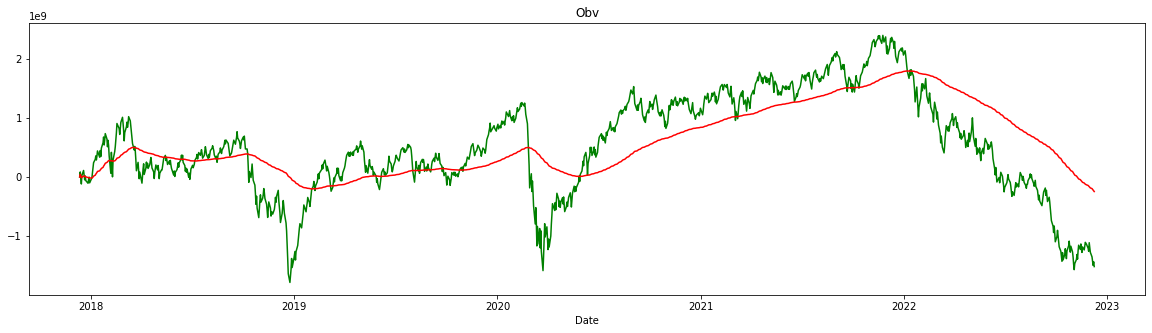

In [121]:
plt.figure(figsize = (20,5))
plt.plot(newdf['OBV'],label = 'OBV',color = 'g')
plt.plot(newdf['OBV_EMA'],label = 'OBV_EMA',color = 'r')
plt.title('Obv')
plt.xlabel('Date')
plt.show()

#STRATEGY

When OBV crosses above OBV EMA BUY! and on opposite Sell

In [122]:
def buy_sell(signal, col1, col2):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(0,len(signal)):
    # If OBV > OBV_EMA THEN Buy ; Col1 equals 'OBV and Col2 equals 'OBV_EMA
    if signal[col1][i] > signal[col2][i] and flag!= 1:
      sigPriceBuy.append(signal['Close'][i])
      sigPriceSell.append(np.nan)
      flag = 1
    #If OBV < OBV_EMA THEN Sell
    elif signal[col1][i] < signal[col2][i] and flag!= 0:
      sigPriceSell.append(signal['Close'][i])
      sigPriceBuy.append(np.nan)
      flag = 0
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)
  return sigPriceBuy,sigPriceSell

In [123]:
y = buy_sell(newdf,'OBV','OBV_EMA')
newdf['Buy_Signal_Price'] = y[0]
newdf['Sell_Signal_Price'] = y[1]
newdf

,Date,Open,High,Low,Close,Adj Close,Volume,aroon_oscillator,OBV,OBV_EMA,Buy_Signal_Price,Sell_Signal_Price
2017-12-11,2017-12-11,266.309998,266.380005,265.480011,266.309998,243.264587,83077500,NaN,0,0.000000e+00,NaN,NaN
2017-12-12,2017-12-12,267.209991,267.320007,266.350006,266.779999,243.693939,85195800,NaN,85195800,4.281089e+07,266.779999,NaN
2017-12-13,2017-12-13,267.059998,267.559998,266.649994,266.750000,243.666565,102905400,NaN,-17709600,2.243532e+07,NaN,266.75
2017-12-14,2017-12-14,267.089996,267.220001,265.600006,265.660004,242.670837,100666700,NaN,-118376300,-1.329738e+07,NaN,NaN
2017-12-15,2017-12-15,265.450012,267.040009,265.390015,266.510010,244.691650,144610300,NaN,26234000,-5.232190e+06,266.510010,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-05,2022-12-05,403.950012,404.929993,398.170013,399.589996,397.763458,77289800,76.0,-1348978100,-1.963220e+08,NaN,NaN
2022-12-06,2022-12-06,399.420013,399.989990,391.640015,393.829987,392.029785,77972200,76.0,-1426950300,-2.085671e+08,NaN,NaN
2022-12-07,2022-12-07,392.940002,395.640015,391.970001,393.160004,391.362854,65927900,76.0,-1492878200,-2.213463e+08,NaN,NaN
2022-12-08,2022-12-08,395.140015,397.359985,393.269989,396.239990,394.428772,60737900,76.0,-1432140300,-2.333941e+08,NaN,NaN


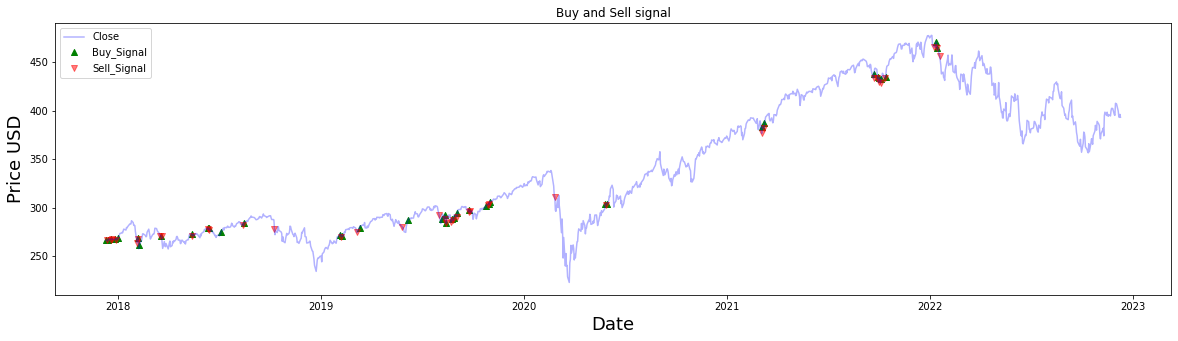

In [124]:
plt.figure(figsize = (20,5))
plt.plot(newdf['Close'],label = 'Close',color = 'b', alpha = 0.3)
plt.scatter(newdf.index,newdf['Buy_Signal_Price'],
            label = 'Buy_Signal',
            marker = '^',
            color = 'g', alpha = 1)
plt.scatter(newdf.index,newdf['Sell_Signal_Price'],
            label = 'Sell_Signal',
            marker = 'v',
            color = 'r', alpha = .5)
plt.title('Buy and Sell signal')
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Price USD',fontsize = 18)
plt.legend(loc = 'upper left')
plt.show()

In [126]:
capital = 1000000
no_of_stocks = capital // max(newdf.Close)
cash = 1000000
stocks_held = 0
buy_check = newdf['Buy_Signal_Price'].isna()
sell_check = newdf['Sell_Signal_Price'].isna()

for i in range(1,len(newdf)):

  if buy_check[i] == False:
    cash -= no_of_stocks*newdf['Buy_Signal_Price'][i]
    stocks_held += no_of_stocks

  if sell_check[i] == False:
    cash += no_of_stocks*newdf['Sell_Signal_Price'][i]
    stocks_held -= no_of_stocks

final_assets = (cash + stocks_held*newdf['Close'][len(newdf)-1])
no_of_days = len(newdf)
returns = ((final_assets/capital)**(float(no_of_days)/(5*365))-1)*100

print("Profit",returns,'%')

Profit 17.245379968458096 %
